# EDA (Exploratory Data Analysis)
The process of:
- Organizing 
- Plotting
- Summarizing

a dataset.

In [22]:
import pandas as pd

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [35]:
# DataFrame选取指定列，将列名作为列表
df = df_swing[['state', 'county', 'dem_share']]
df.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


# 直方图
直方图主要用来反映一组样本数据的分布情况。从图的形式来看，它属于**柱状图**的一种，但它和柱状图相比还是有很多不同之处的：
- 直方图的任意两个 bar 之间不允许有间隙，这是因为原始样本值被分割成一系列连续的、相互邻接的小区间，每一个小区间都是左闭右开的，除了最后一个，如[x0, x1), [x1,x2), [x2,x3）；
- 在直方图中小区间又被称为“bin”。其中bin的高度是由落入该区间中样本值的个数决定的；

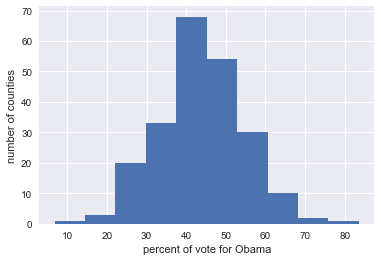

In [36]:
import matplotlib.pyplot as plt

# 将返回值保存到dummy变量‘_’中
_ = plt.hist(df['dem_share'])

# 最佳实践：永远永远永远对坐标轴进行标注
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

**bins** : integer or sequence or ‘auto’, optional

- If an integer is given, bins + 1 bin edges are calculated and returned, consistent with numpy.histogram().
- If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.
- All but the last (righthand-most) bin is half-open. In other words, if bins is:
```
[1, 2, 3, 4]
```
then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.

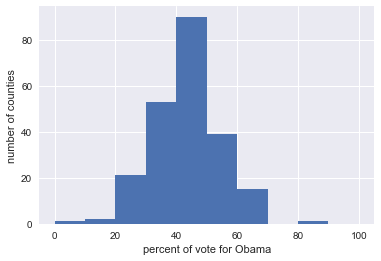

In [37]:
# binning
import matplotlib.pyplot as plt

# 指定区间
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 将返回值保存到dummy变量‘_’中
_ = plt.hist(df['dem_share'], bins=bin_edges)

# 最佳实践：永远永远永远对坐标轴进行标注
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

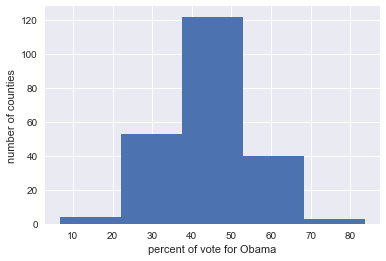

In [38]:
import matplotlib.pyplot as plt

# 将返回值保存到dummy变量‘_’中
# bins参数默认为10
# 将样本值划分为bins个区间，也即有bins+1个bin edges
_ = plt.hist(df['dem_share'], bins=5)

# 最佳实践：永远永远永远对坐标轴进行标注
_ = plt.xlabel('percent of vote for Obama')
_ = plt.ylabel('number of counties')
plt.show()

# 练习1
读取鸢尾花(virginica亚属)的数据(iris.csv)，创建四个code block，将`sepal_length`、`sepal_width`、`petal_length`和`petal_width`数据通过直方图呈现。

参考代码：
```
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 读取数据
df = pd.read_csv('../data/iris.csv')

# sepal_length where species is virginica
virginica = df.loc[df['species'] == 'virginica']

# 获取sepal_length
sepal_length = virginica['sepal_length']

# 剩余代码请自行补齐
```

In [39]:
# sepal_length

In [40]:
# sepal_width

In [41]:
# petal_length

In [42]:
# petal_width

# Subplots


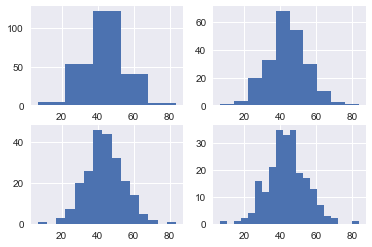

In [48]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=2, ncols=2)

n = 1
for row in ax:
    for col in row:
        bins = 5*n
        _ = col.hist(df['dem_share'], bins=bins)
        n += 1

plt.show()

# Binning bias
**问题**: 
- bins参数的不同，对应的直方图也不一样，从而导致可能得出不同的解释；
- 直方图并没有显示所有的数据，而只是显示对应区间样本的数量(频次);

# Bee Swarm Plot
参考： http://resources.rhoworld.com/blog/resourcebrcenter/rhos-blog/i-swarm-you-swarm-we-all-swarm-for-beeswarm-plots-0

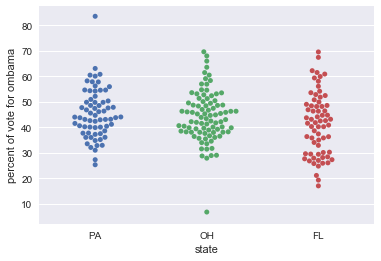

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for ombama')

plt.show()

# 练习2

读取iris数据，绘制bee swarm plot (x为`species`，y为`sepal_length`)。要求为坐标轴打上标签。

参考代码：
```
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 读取数据
df = pd.read_csv('../data/iris.csv')

# 剩余代码请自行补齐
```


In [ ]:
# 练习2代码......

# ECDF (Empirical cumulative distribution functions)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

In [56]:
x = np.sort(df_swing['dem_share'])
n = len(x)
y = np.arange(1, n+1)/n
print(y)

[0.0045045  0.00900901 0.01351351 0.01801802 0.02252252 0.02702703
 0.03153153 0.03603604 0.04054054 0.04504505 0.04954955 0.05405405
 0.05855856 0.06306306 0.06756757 0.07207207 0.07657658 0.08108108
 0.08558559 0.09009009 0.09459459 0.0990991  0.1036036  0.10810811
 0.11261261 0.11711712 0.12162162 0.12612613 0.13063063 0.13513514
 0.13963964 0.14414414 0.14864865 0.15315315 0.15765766 0.16216216
 0.16666667 0.17117117 0.17567568 0.18018018 0.18468468 0.18918919
 0.19369369 0.1981982  0.2027027  0.20720721 0.21171171 0.21621622
 0.22072072 0.22522523 0.22972973 0.23423423 0.23873874 0.24324324
 0.24774775 0.25225225 0.25675676 0.26126126 0.26576577 0.27027027
 0.27477477 0.27927928 0.28378378 0.28828829 0.29279279 0.2972973
 0.3018018  0.30630631 0.31081081 0.31531532 0.31981982 0.32432432
 0.32882883 0.33333333 0.33783784 0.34234234 0.34684685 0.35135135
 0.35585586 0.36036036 0.36486486 0.36936937 0.37387387 0.37837838
 0.38288288 0.38738739 0.39189189 0.3963964  0.4009009  0.40540

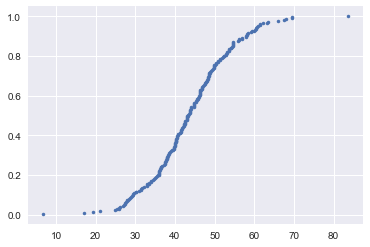

In [58]:
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('percent of vote for ombama')
plt.ylabel('ECDF')
plt.show()

# 练习3
- 创造一个`ecdf`函数，该函数原型：
```
def ecdf(data):
    """
    输入参数为样本数据，类型为列表
    返回值为绘制ecdf图所需要的x和y
    """
    
    # Number of data points: n
    n = _____
    
    # x-data for the ECDF: x
    x = _____
    
    # y-data for the ECDF: y
    y = _____
    
    return x, y
```
- 使用iris数据，绘制`virginica`类别的sepal_length数据的ECDF图，使用上面定义的`ecdf`函数。

In [ ]:
# 练习3代码

# Box plot

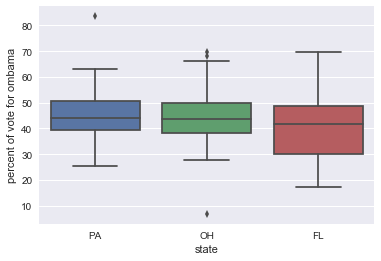

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

_ = sns.boxplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for ombama')

plt.show()

# 练习4
使用iris数据，绘制不同种类(`species`，共计3种)鸢尾花`sepal_length`的box plot。

In [ ]:
# 练习4代码

# Scatter Plot

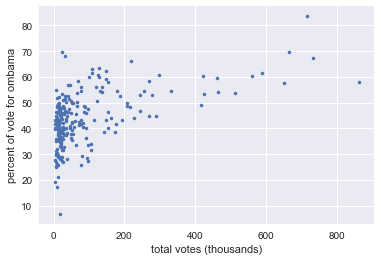

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2008年美国大选数据，三个州PA/OH/FL各个县(county)的数据
# 民主党(dem)，共和党(rep)
df_swing = pd.read_csv('../data/2008_swing_states.csv')

total_votes = df_swing['total_votes']
dem_share = df_swing['dem_share']
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for ombama')

plt.show()

# 练习5
从iris数据，获取`virginica`种类鸢尾花两个属性`petal_length`和`petal_width`的数据。使用Scatter plot绘制对这两组数据进行可视化。

In [64]:
# 练习5代码